## Solving bidomain equations on rectangular domain

### Importing required libraries

In [1]:
%cd ../../..
from src.models.dynamics_models import *
from src.models.cell_models import *
from src.utils import *
import ufl

/home/drvinko/Desktop/Modeliranje-biofizike-srcanog-tkiva


### Defining a domain, cell model and dynamics model and visualizing initial data

In [2]:
domain = rectangle(1, 1, 32, 32)
x = ufl.SpatialCoordinate(domain)

In [3]:
class Model(BidomainModel):
    def initial_V_m(self):
        self.V_m_n.x.array[:] = -85
        locator = lambda x: x[0] < 0.1
        cells = fem.locate_dofs_geometrical(self.V1, locator)
        self.V_m_n.x.array[cells] = np.full_like(cells, -50)

    def conductivity(self):
        # Muscle fibres
        self.fibers = ufl.as_vector([1, 0])

        # Healthy conductivities
        self.M_i = self.SIGMA_IT * ufl.Identity(2) + (
            self.SIGMA_IN - self.SIGMA_IT
        ) * ufl.outer(self.fibers, self.fibers)
        self.M_e = self.SIGMA_ET * ufl.Identity(2) + (
            self.SIGMA_EN - self.SIGMA_ET
        ) * ufl.outer(self.fibers, self.fibers)

In [4]:
cell_model = BeelerReuter(domain)
model = Model(domain, cell_model)

In [5]:
model.plot_initial_V_m(camera_direction=[0,0,1])

2024-01-25 18:10:42.113 (   0.598s) [    7F68ABBCC740]        vtkRenderer.cxx:1161  WARN| vtkOpenGLRenderer (0x56110bd205c0): Resetting view-up since view plane normal is parallel


Widget(value='<iframe src="http://localhost:41523/index.html?ui=P_0x7f683e630610_0&reconnect=auto" class="pyvi…

### Solving equations with given parameters

In [6]:
model.solve(
    T=500,
    steps=8000,
    save_to="rectangle/bidomain_BR.mp4",
    signal_point=[0.5, 0.5, 0.0],
    camera_direction='xy'
)

Solving problem: 100%|██████████| 8000/8000 [18:50<00:00,  7.08it/s]


### Plotting a fiber orientations

In [7]:
plot_vector_field(domain, lambda x: (1, 0, 0), 0.03, 0.1)

Widget(value='<iframe src="http://localhost:41523/index.html?ui=P_0x7f67ccb38310_1&reconnect=auto" class="pyvi…

### Plotting a final plot of transmembrane potential

In [8]:
plot_function(model.V_m_n, "V_m", show_mesh=False)

Widget(value='<iframe src="http://localhost:41523/index.html?ui=P_0x7f67a838f590_2&reconnect=auto" class="pyvi…

### Plotting a transmembrane potential in a given signal point

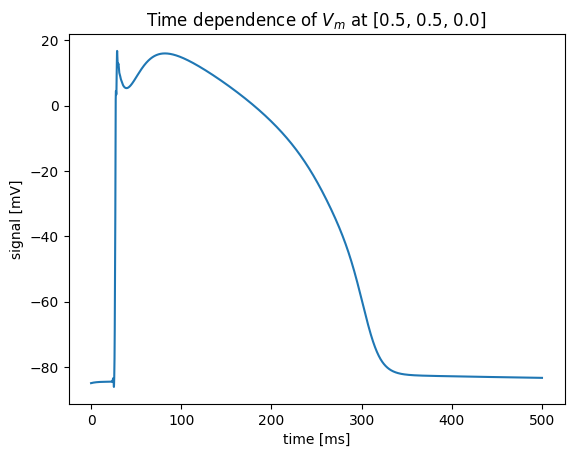

ERROR:wslink.protocol:Exception raised
ERROR:wslink.protocol:KeyError('eb9fa8d03e57790e48619bdae8457466_4225d')
ERROR:wslink.protocol:Traceback (most recent call last):
  File "/home/drvinko/miniconda3/envs/diplomski/lib/python3.11/site-packages/wslink/protocol.py", line 332, in onMessage
    results = func(*args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^
  File "/home/drvinko/miniconda3/envs/diplomski/lib/python3.11/site-packages/trame_vtk/modules/vtk/protocols/local_rendering.py", line 33, in get_array
    self.context.get_cached_data_array(data_hash, binary)
  File "/home/drvinko/miniconda3/envs/diplomski/lib/python3.11/site-packages/trame_vtk/modules/vtk/serializers/synchronization_context.py", line 30, in get_cached_data_array
    cache_obj = self.data_array_cache[p_md5]
                ~~~~~~~~~~~~~~~~~~~~~^^^^^^^
KeyError: 'eb9fa8d03e57790e48619bdae8457466_4225d'

ERROR:wslink.protocol:Exception raised
ERROR:wslink.protocol:KeyError('eb9fa8d03e57790e48619bdae8457466_4225d')


In [ ]:
model.plot_signal()